In [23]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression


## Preparation

* Create the target variable by mapping `yes` to 1 and `no` to 0. 
* Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` funciton for that with `random_state=1`.



In [2]:
df = pd.read_csv('AER_credit_card_data.csv')

df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


In [11]:
df_hw = df.copy()

In [12]:
df_hw['card'] = df_hw.card.apply(lambda x: 1 if x=='yes' else 0)

In [13]:
#Split the data into train and test sets
df_full_train, df_test = train_test_split(df_hw, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)


In [14]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


y_train = df_train.card.values
y_val = df_val.card.values
y_test = df_test.card.values

del df_train['card']
del df_val['card']
del df_test['card']


## Question 1

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score and compute AUC with the `card` variable.
* Use the training dataset for that.

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['expenditure']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `reports`
- `dependents`
- `active`
- `share`

In [17]:
numerical = ['reports', 'dependents', 'active', 'share']

#Calculate AUC for these 4 features
for col in numerical:
    auc = roc_auc_score(y_train, df_train[col])
    print(f'{col}: {auc:.3f}')


## Answer: share

reports: 0.283
dependents: 0.467
active: 0.604
share: 0.989


## Training the model

From now on, use these columns only:

```
["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]
```

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

In [18]:
columns = ["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]

df_hw = df[columns]
df_hw['card'] = df.card.apply(lambda x: 1 if x=='yes' else 0)

In [19]:
df_hw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   reports      1319 non-null   int64  
 1   age          1319 non-null   float64
 2   income       1319 non-null   float64
 3   share        1319 non-null   float64
 4   expenditure  1319 non-null   float64
 5   dependents   1319 non-null   int64  
 6   months       1319 non-null   int64  
 7   majorcards   1319 non-null   int64  
 8   active       1319 non-null   int64  
 9   owner        1319 non-null   object 
 10  selfemp      1319 non-null   object 
 11  card         1319 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 123.8+ KB


In [24]:
from sklearn.feature_extraction import DictVectorizer


categorical = ['owner', 'selfemp']
numerical = ['reports', 'age', 'income', 'share', 'expenditure', 'dependents', 'months', 'majorcards', 'active']


dv = DictVectorizer(sparse=False)
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

test_dict = df_test[categorical + numerical].to_dict(orient='records')
val_dict = df_val[categorical + numerical].to_dict(orient='records')

X_test = dv.fit_transform(test_dict)
X_val = dv.fit_transform(val_dict)

In [26]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

## Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.615
- 0.515
- 0.715
- 0.995


In [29]:
## AUC of the model on the validation dataset
y_pred = model.predict_proba(X_val)[:, 1]
round(roc_auc_score(y_val, y_pred),3)

0.995

## Question 3

Now let's compute precision and recall for our model.

* Evaluate the model on the validation dataset on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them


At which threshold precision and recall curves intersect?

* 0.1
* 0.3
* 0.6
* 0.8

In [30]:
thresholds = np.linspace(0, 1, 101)
scores = []
for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((t, tp, tn, fp, fn))


columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)


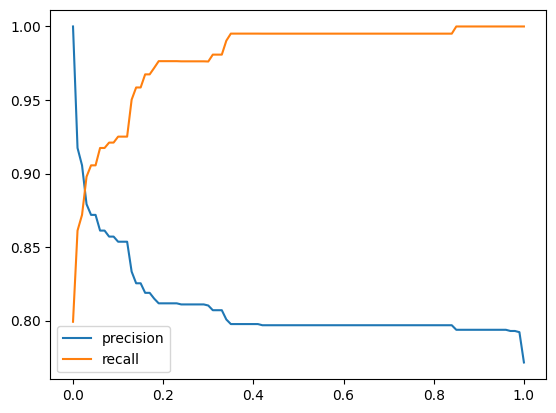

In [31]:
#Graph precision and recall
plt.plot(df_scores.threshold, df_scores.precision, label='precision')
plt.plot(df_scores.threshold, df_scores.recall, label='recall')
plt.legend()
plt.show()

In [37]:
## Answer: 0.1
df_scores[(df_scores.precision - df_scores.recall).abs() <= 0.1]


,threshold,tp,fp,fn,tn,tpr,fpr,precision,recall
1,0.01,211,19,34,0,0.861224,1.000000,0.917391,0.861224
2,0.02,211,22,31,0,0.871901,1.000000,0.905579,0.871901
3,0.03,211,29,24,0,0.897872,1.000000,0.879167,0.897872
4,0.04,211,31,22,0,0.905579,1.000000,0.871901,0.905579
5,0.05,211,31,22,0,0.905579,1.000000,0.871901,0.905579
6,0.06,211,34,19,0,0.917391,1.000000,0.861224,0.917391
7,0.07,211,34,19,0,0.917391,1.000000,0.861224,0.917391
8,0.08,210,35,18,1,0.921053,0.972222,0.857143,0.921053
9,0.09,210,35,18,1,0.921053,0.972222,0.857143,0.921053
10,0.10,210,36,17,1,0.925110,0.972973,0.853659,0.925110


## Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing $F_1$:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01 using the validation set

At which threshold F1 is maximal?

- 0.1
- 0.4
- 0.6
- 0.7

